<a href="https://www.kaggle.com/code/mustafashoukat/decoding-billionaire-trends-unleashing-kerne?scriptVersionId=181866495" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <b><div style='padding:17px;background-color:#6cbdab;color:black;border-radius:2px;font-size:90%;text-align: center'>  📊💡 Decoding Billionaire Trends: Unleashing Kernel PCA 🚀💰

> Hi there! 


> I'm Mustafa Shoukat, a data scientist in training. I'm in the world of data science and exploring various concepts and techniques to enhance my skills. Join me on this exciting journey as we learn and grow in the field of data science together

> "Community is the heart of growth and learning. Together, we can achieve more than we ever could alone."


| Name               | Email                                               | LinkedIn                                                  | GitHub                                           | Kaggle                                        |
|--------------------|-----------------------------------------------------|-----------------------------------------------------------|--------------------------------------------------|-----------------------------------------------|
| **Mustafa Shoukat**      |mustafashoukat.email@gmail.com  | [![LinkedIn Badge](https://img.shields.io/badge/LinkedIn-%23000000.svg?style=for-the-badge&logo=LinkedIn&logoColor=white)](https://www.linkedin.com/in/mustafashoukat/)  | [![GitHub Badge](https://img.shields.io/badge/GitHub-%23000000.svg?style=for-the-badge&logo=GitHub&logoColor=white)](https://github.com/Mustafa-Shoukat1)  | [![Kaggle Badge](https://img.shields.io/badge/Kaggle-%23000000.svg?style=for-the-badge&logo=Kaggle&logoColor=white)](https://www.kaggle.com/mustafashoukat)  |

> Rumor has it that the ultra-wealthy community consists of either investment bankers or entrepreneurs in the tech industry that dropped out of college. Is that stereotype really true? Ever wonder if the top billionaires in the world share anything in common? Although, we can't say with certainty what it takes to be one, we do have a way to determine if any patterns exist among the richest people in the world.


In this notebook, you will explore Kernel Principal Component Analysis (Kernel PCA) - an extension of principal component analysis (PCA) - to extract key feature patterns in the dataset, which is usually of higher dimension. In addition to analyzing billionaires around the globe, we will also use this unsupervised learning technique to denoise images.

![img](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/RichPeople.png)


<b><div style='padding:17px;background-color:#6cbdab;color:black;border-radius:2px;font-size:90%;text-align: center'>  Datasets 📙📙📙

Datasets for this lab are gathered from the [kaggle](https://www.kaggle.com/datasets/jjdaguirre/forbes-billionaires-2022?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) under the Public Domain License.


***


<b><div style='padding:17px;background-color:#6cbdab;color:black;border-radius:2px;font-size:90%;text-align: center'>  Importing Required Libraries 📥📦📤🚚 


In [1]:
# Surpress warnings from using older version of sklearn:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
import pandas as pd
from itertools import accumulate

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_style('white')

<b><div style='padding:17px;background-color:#6cbdab;color:black;border-radius:2px;font-size:90%;text-align: center'> Defining Helper Functions ⚙️🛠️👷🏼⛑️ 


This function will plot projections onto a vector.


In [2]:
def plot_proj(A,v,y,name=None):

    plt.scatter(A[:,0],A[:,1],label='data',c=y,cmap='viridis')
    
    #plt.plot(np.linspace(A[:,0].min(),A[:,0].max()),np.linspace(A[:,1].min(),A[:,1].max())*(v[1]/v[0]),color='black',linestyle='--',linewidth=1.5,label=name)   
    plt.plot(np.linspace(-1,1),np.linspace(-1,1)*(v[1]/v[0]),color='black',linestyle='--',linewidth=1.5,label=name)  
    # Run through all the data

    for i in range(len(A[:,0])-1):
        #data point 
        w=A[i,:]

        # projection
        cv = (np.dot( A[i,:],v))/np.dot(v,np.transpose(v))*v

        # line between data point and projection
        plt.plot([A[i,0],cv[0]],[A[i,1],cv[1]],'r--',linewidth=1.5)
    plt.plot([A[-1,0],cv[0]],[A[-1,1],cv[1]],'r--',linewidth=1.5,label='projections' )
    plt.legend()
    plt.show()

<b><div style='padding:17px;background-color:#6cbdab;color:black;border-radius:2px;font-size:90%;text-align: center'> What does kernel PCA do?

Kernel PCA maps the data into a higher dimensional space then performs PCA. The mapping to the higher dimensional space may be difficult to calculate, so the mapping is done via a kernel. As a result, you don't need to calculate the mapping, but you get all the benefits. The process is shown here:

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/image.png"  />
</center>

Many standard tasks can be done with PCA, but in many applications, you may get a better result using kernel PCA. Applications include:

*   Reduce the dimensionality of data
    *   By reducing data dimensionality, PCA can also help with visualization
*   May reduce noise in the process
*   Can be used to pre-process data improving the result of your algorithm


<b><div style='padding:17px;background-color:#6cbdab;color:black;border-radius:2px;font-size:90%;text-align: center'> Using Kernel PCA to Predict if You're the Richest Person in the World 👜✨💵 ⚜🐎🥂°˖˚


> Let's see if we can use Kernel PCA to help us better visualize if any trends exist among the richest people in the world. "The World's Billionaires" is an annual ranking documenting the net worth of the wealthiest billionaires in the world, compiled and published in March, annually, by the American business magazine - Forbes. For this lab, we obtained the dataset from <a href="https://www.kaggle.com/datasets/jjdaguirre/forbes-billionaires-2022?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01"> here</a>.


<b><div style='padding:17px;background-color:#6cbdab;color:black;border-radius:2px;font-size:90%;text-align: center'> Data Loading Analysis 🔎


We load the dataset and take a look to see if it loaded properly.

In [3]:
# Download the dataset and read it into a Pandas dataframe
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/billionaires.csv',index_col="Unnamed: 0")
df.head()

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


Checking the dataframe dimension, we notice that there are a total of 2600 samples.


In [4]:
df.shape

(2600, 7)

For each column, we can take a look at its unique values.


In [5]:
for col in df:
    print(str.format("{} has {} unique values.", col, len(df[col].unique())))

rank has 228 unique values.
name has 2598 unique values.
networth has 228 unique values.
age has 76 unique values.
country has 75 unique values.
source has 895 unique values.
industry has 18 unique values.


Notably, there are only 228 unique rank values, which is due to many ties in the rankings.


In [6]:
df[-100:-1]

,rank,name,networth,age,country,source,industry
2500,2448,Koo Bon-sik,$1.1 B,63,South Korea,LG,Technology
2501,2448,Suresh Krishna,$1.1 B,85,India,auto parts,Automotive
2502,2448,Nancy Lerner,$1.1 B,61,United States,"banking, credit cards",Finance & Investments
2503,2448,Norma Lerner,$1.1 B,86,United States,banking,Finance & Investments
2504,2448,Randolph Lerner,$1.1 B,60,United States,"banking, credit cards",Finance & Investments
...,...,...,...,...,...,...,...
2594,2578,Fu Gang,$1 B,51,China,pharma retailing,Healthcare
2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail



<b><div style='padding:17px;background-color:#6cbdab;color:black;border-radius:2px;font-size:90%;text-align: center'>"🌟 Billionaire Status: Wealth Visualized 💰"

We can see that in this dataset, certain countries and industries contain more billionaires than others. We also examine the pairwise plot and correlation coefficient between age and rank, which tells us that the two features are negatively correlated.


,age,rank
age,1.000000,-0.124947
rank,-0.124947,1.000000


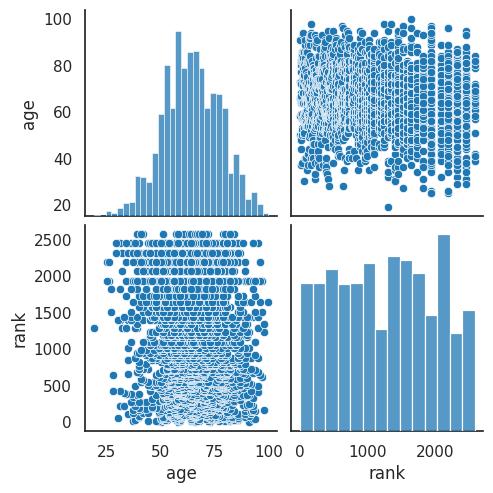

In [7]:
sns.pairplot(df[['age','rank']])
df[['age','rank']].corr()

For the variables that we don't use in prediction, we can save them separately:


In [8]:
B_names,networths,sources,industrys=df['name'],df['networth'],df['source'],df['industry']
B_names,networths,sources,industrys

(0                      Elon Musk 
 1                     Jeff Bezos 
 2       Bernard Arnault & family 
 3                     Bill Gates 
 4                 Warren Buffett 
                   ...            
 2595      Jorge Gallardo Ballart 
 2596                Nari Genomal 
 2597              Ramesh Genomal 
 2598              Sunder Genomal 
 2599       Horst-Otto Gerberding 
 Name: name, Length: 2600, dtype: object,
 0       $219 B
 1       $171 B
 2       $158 B
 3       $129 B
 4       $118 B
          ...  
 2595      $1 B
 2596      $1 B
 2597      $1 B
 2598      $1 B
 2599      $1 B
 Name: networth, Length: 2600, dtype: object,
 0                Tesla, SpaceX
 1                       Amazon
 2                         LVMH
 3                    Microsoft
 4           Berkshire Hathaway
                  ...          
 2595           pharmaceuticals
 2596                   apparel
 2597                   apparel
 2598                  garments
 2599    flavors and fragrances

We assign `rank`  to  `y`, our target, for prediction.


In [9]:
y=df['rank']
y.head()

0    1
1    2
2    3
3    4
4    5
Name: rank, dtype: int64

Next, let's drop all the features we are not going to use for the task:


In [10]:
df.drop(columns=['name','networth','source'],inplace=True)
df.head()

,rank,age,country,industry
0,1,50,United States,Automotive
1,2,58,United States,Technology
2,3,73,France,Fashion & Retail
3,4,66,United States,Technology
4,5,91,United States,Finance & Investments


<b><div style='padding:17px;background-color:#6cbdab;color:black;border-radius:2px;font-size:90%;text-align: center'> 🔢 Convert Categorical Variables to Dummy Variables with One-Hot Encoding 📊

In [11]:
one_hot = ColumnTransformer(transformers=[("one_hot", OneHotEncoder(), ['country','industry']) ],remainder="passthrough")
data=one_hot.fit_transform(df)

In [12]:
names=one_hot.get_feature_names_out()
column_names=[name[name.find("_")+1:] for name in  [name[name.find("__")+2:] for name in names]]
new_data=pd.DataFrame(data.toarray(),columns=column_names)
new_data.head()

,Algeria,Argentina,Australia,Austria,Barbados,Belgium,Belize,Brazil,Bulgaria,Canada,...,Manufacturing,Media & Entertainment,Metals & Mining,Real Estate,Service,Sports,Technology,Telecom,rank,age
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,58.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,73.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,66.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,91.0


<b><div style='padding:17px;background-color:#6cbdab;color:black;border-radius:2px;font-size:90%;text-align: center'>  🌟 Unleashing the Power of Kernel PCA 🌀


Let's define a Kernel PCA object and fit it on this new data:


In [13]:
kernel_pca = KernelPCA(kernel="rbf" ,fit_inverse_transform=True, alpha=0.1)
kernel_score=kernel_pca.fit_transform(new_data)

<b><div style='padding:17px;background-color:#6cbdab;color:black;border-radius:2px;font-size:90%;text-align: center'>  Using Kernel PCA 🌀 for Visualization


In [14]:
ranking=13

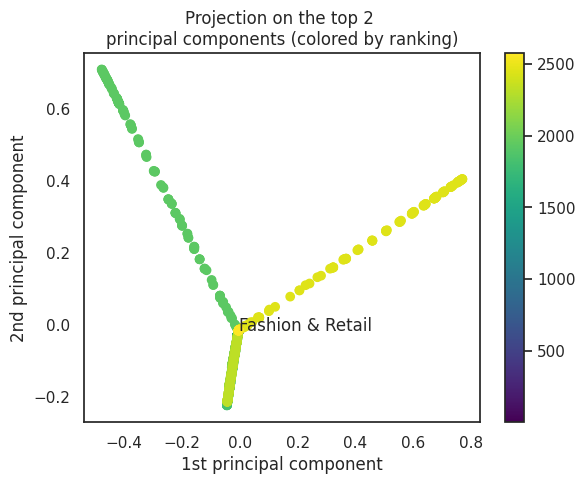

In [15]:
fig, ax = plt.subplots()

sc=ax.scatter(kernel_score[:,0],kernel_score[:,1] ,c=y,cmap='viridis')
fig.colorbar(sc, orientation='vertical')
ax.annotate(industrys[ranking], (kernel_score[ranking,0],kernel_score[ranking,1]))
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.title("Projection on the top 2 \nprincipal components (colored by ranking)")
plt.show()

We see a Bifurcation of the data dependent on the rank. The diverging branches suggest that difference in ranking can be associated with certain patterns in the data. This becomes more apparent in the 3-dimensional projection space:


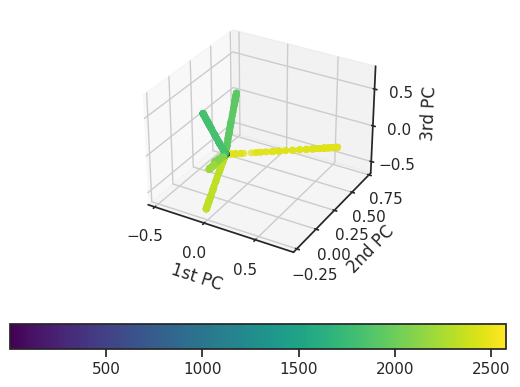

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
sc=ax.scatter(kernel_score[:,0], kernel_score[:,1],  kernel_score[:,2], c=y, cmap='viridis', linewidth=0.5);
fig.colorbar(sc, orientation='horizontal')
ax.set_xlabel('1st PC')
ax.set_ylabel('2nd PC')
ax.set_zlabel('3rd PC')
plt.show()

Each line corresponds to a different range of ranking (represented by the varying colors), so let's see what happens when we apply PCA and plot the projection space in 1, 2, and 3 dimensions respectively.


In [17]:
pca = PCA()
score_pca = pca.fit_transform(new_data)

Even in the 1D projection space, we can see a pattern for rankings, which decreases as we move toward the right.


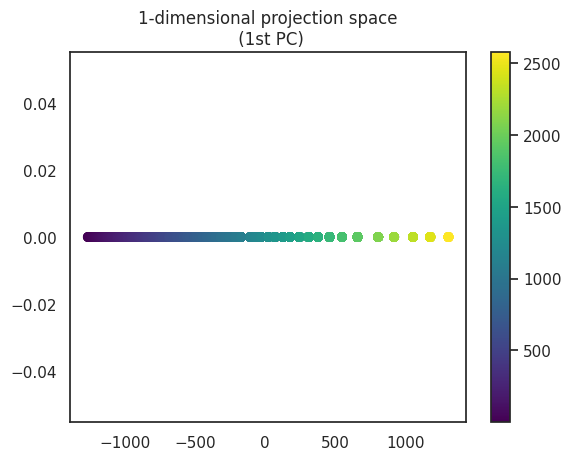

In [18]:
fig, ax = plt.subplots()
sc=ax.scatter(score_pca[:,0],np.zeros(score_pca[:,1].shape ),c=y,cmap='viridis')
ax.set_title('1-dimensional projection space\n (1st PC)')
fig.colorbar(sc, orientation='vertical')
plt.show()

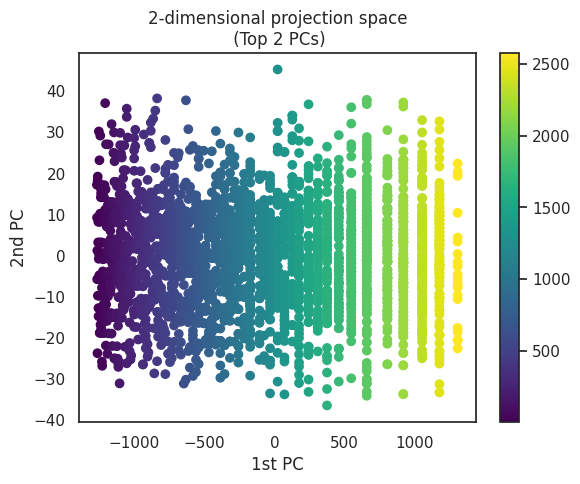

In [19]:
fig, ax = plt.subplots()
sc=ax.scatter(score_pca[:,0],score_pca[:,1] ,c=y,cmap='viridis')
fig.colorbar(sc, orientation='vertical')
ax.set_title('2-dimensional projection space\n (Top 2 PCs)')
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.show()

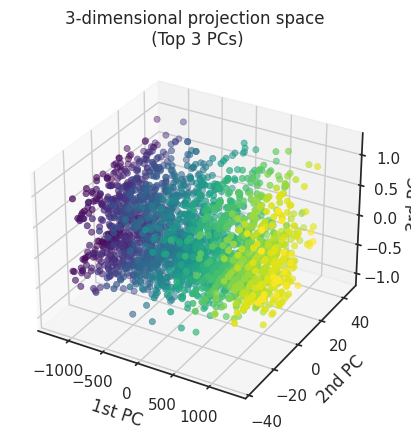

In [20]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
sc=ax.scatter(score_pca[:,0], score_pca[:,1],  score_pca[:,2], c=y, cmap='viridis', linewidth=0.5);
ax.set_title('3-dimensional projection space\n (Top 3 PCs)')
ax.set_xlabel('1st PC')
ax.set_ylabel('2nd PC')
ax.set_zlabel('3rd PC')
plt.show()

> In the 2-dimensional and 3-dimensional projection space, we see a similar trend that rankings change across the x-axis, meaning that most of its variation occurs in the projection on the first principal component.

> From this example, we can observe that surely, some combination of the features `country`, `industry`, and `age` leads to consistent change in rankings. It is important to note that due to the nature of PCA in general, we aren't able to decrypt what that combination is.


<b><div style='padding:17px;background-color:#6cbdab;color:black;border-radius:2px;font-size:90%;text-align: center'> Using Kernel PCA to Improve Prediction 🔎📉 


In [21]:
from sklearn.linear_model import Ridge

In [22]:
X_train, X_test, y_train, y_test = train_test_split(kernel_score, y, test_size=0.4, random_state=0)
lr = Ridge(alpha=0).fit(X_train, y_train)
print(str.format("Test set R^2 score for Kernel PCA: {}", lr.score(X_test, y_test)))

Test set R^2 score for Kernel PCA: 0.9885118791787183


In [23]:
X_train, X_test, y_train, y_test = train_test_split(score_pca, y, test_size=0.40, random_state=0)
lr= Ridge(alpha=0).fit(X_train, y_train)
print(str.format("Test set R^2 score for PCA: {}", lr.score(X_test, y_test)))

Test set R^2 score for PCA: 0.9969141049490515


# <b><div style='padding:17px;background-color:#6cbdab;color:black;border-radius:2px;font-size:90%;text-align: center'> Any suggestions are well received! 😊